In [13]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pickle

# 데이터셋 다운로드
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, header=None, names=column_names)

# 데이터 탐색
print(data.head())
print(data.describe())
print(data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

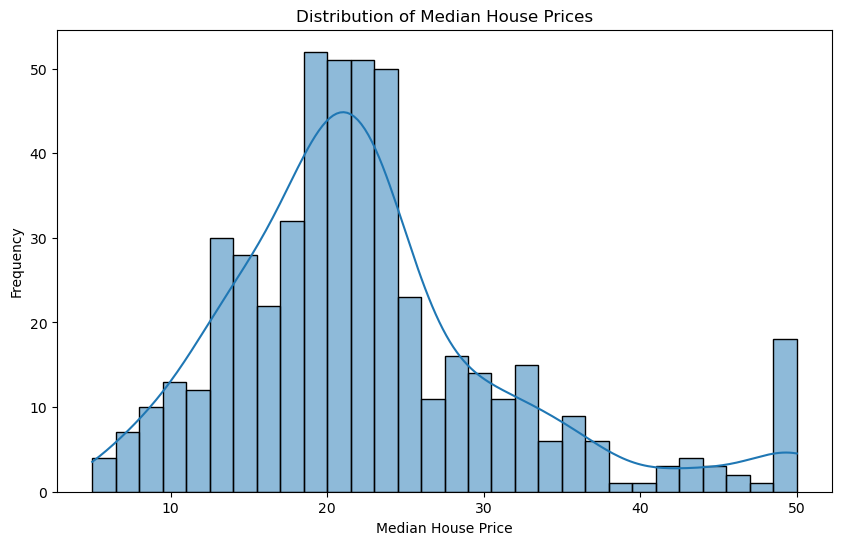

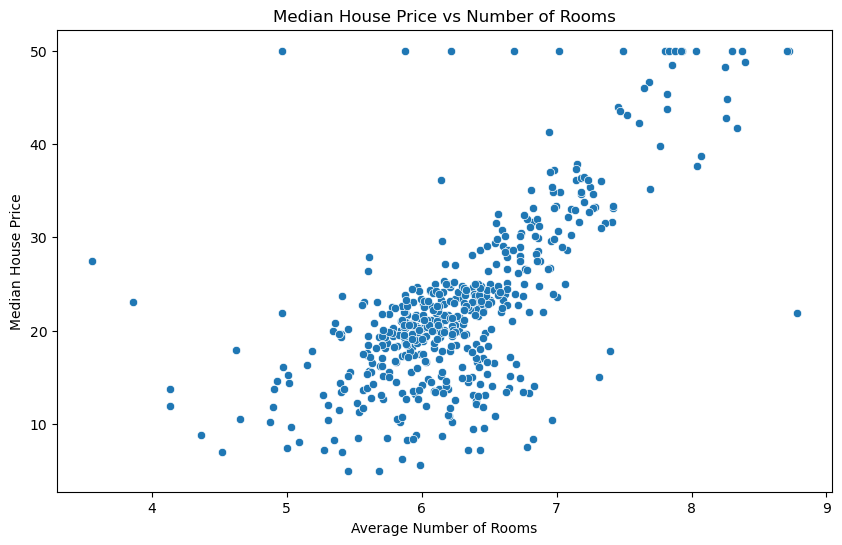

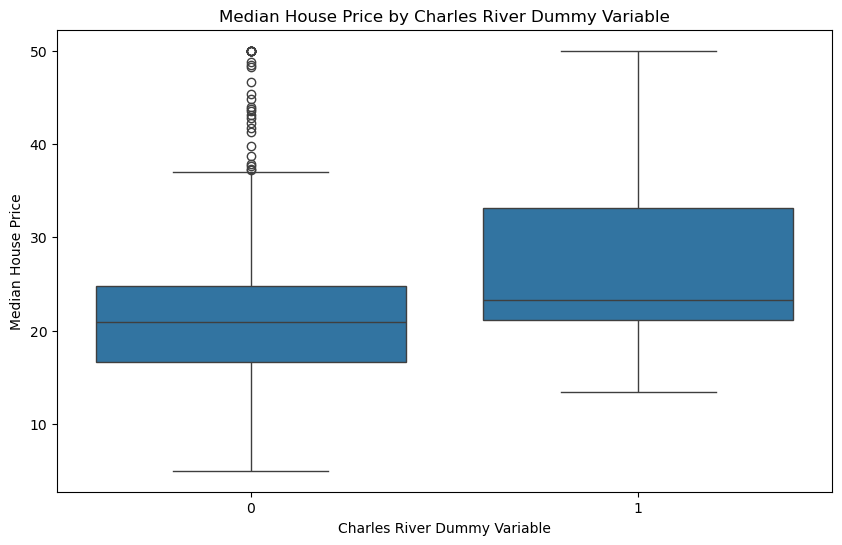

In [14]:
# 데이터 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of Median House Prices')
plt.xlabel('Median House Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Median House Price vs Number of Rooms')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=data)
plt.title('Median House Price by Charles River Dummy Variable')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Median House Price')
plt.show()


In [16]:
# 데이터 분할
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 전처리 파이프라인 설정
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['CHAS']  # 범주형 변수

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 파이프라인 설정
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)


In [19]:
# 모델 학습
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    predictions = model.predict(X_test_processed)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae

# 성능 비교
results_df = pd.DataFrame(results, index=['Mean Absolute Error']).T
print(results_df)


                   Mean Absolute Error
Linear Regression             3.189092
Decision Tree                 2.446078
Random Forest                 2.041637


In [21]:
# Random Forest 최적화
rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_processed, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)


Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best MAE:  2.411224033853449


In [28]:
# 최종 모델 저장
final_model = grid_search.best_estimator_
with open('김신영_머신러닝03기_과제3.pkl', 'wb') as file:
    pickle.dump(final_model, file)
